In [1]:
import pandas as pd
import glob
from collections import defaultdict
import numpy as np
import json


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import seaborn as sns
sns.set(style='whitegrid', palette='muted')

from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor, as_completed

In [2]:
!mkdir -p plots

In [3]:
results_dir = "results/1648838189"
result_name = "5000-ce"

In [4]:
# Parameters
result_name = "5000-rr"
results_dir = "results/1648835886"


In [5]:
forecast_files = glob.glob(f"{results_dir}/forecast.*.jsonl")

key_to_timestamps = defaultdict(list)
key_to_last_seqnos = defaultdict(list)
key_to_last_seqno_to_forecast = defaultdict(dict)
for path in tqdm(forecast_files):
    with open(path) as f:
        for line in f:
            loaded = json.loads(line)
            key_id = str(loaded["key_id"])
            key_to_timestamps[key_id].append(loaded["processing_time"])
            key_to_last_seqnos[key_id].append(loaded["last_seqno"])
            key_to_last_seqno_to_forecast[key_id][loaded["last_seqno"]] = loaded["forecast"]


  0%|                                                                      | 0/16 [00:00<?, ?it/s]

  6%|███▉                                                          | 1/16 [00:10<02:42, 10.80s/it]

 12%|███████▊                                                      | 2/16 [00:22<02:37, 11.24s/it]

 19%|███████████▋                                                  | 3/16 [00:33<02:24, 11.15s/it]

 25%|███████████████▌                                              | 4/16 [00:45<02:16, 11.37s/it]

 31%|███████████████████▍                                          | 5/16 [00:56<02:03, 11.25s/it]

 38%|███████████████████████▎                                      | 6/16 [01:07<01:53, 11.39s/it]

 44%|███████████████████████████▏                                  | 7/16 [01:18<01:40, 11.22s/it]

 50%|███████████████████████████████                               | 8/16 [01:33<01:38, 12.30s/it]

 56%|██████████████████████████████████▉                           | 9/16 [01:44<01:23, 11.90s/it]

 62%|██████████████████████████████████████▏                      | 10/16 [01:55<01:10, 11.77s/it]

 69%|█████████████████████████████████████████▉                   | 11/16 [02:06<00:57, 11.58s/it]

 75%|█████████████████████████████████████████████▊               | 12/16 [02:18<00:46, 11.65s/it]

 81%|█████████████████████████████████████████████████▌           | 13/16 [02:29<00:34, 11.47s/it]

 88%|█████████████████████████████████████████████████████▍       | 14/16 [02:41<00:22, 11.46s/it]

 94%|█████████████████████████████████████████████████████████▏   | 15/16 [02:52<00:11, 11.34s/it]

100%|█████████████████████████████████████████████████████████████| 16/16 [03:03<00:00, 11.36s/it]

100%|█████████████████████████████████████████████████████████████| 16/16 [03:03<00:00, 11.48s/it]

In [6]:
source_files = glob.glob(f"{results_dir}/source.*.jsonl")
key_to_source_series = defaultdict(list)
key_to_source_timestamps = defaultdict(list)
key_to_source_seqno = defaultdict(list)
for path in source_files:
    with open(path) as f:
        for line in tqdm(f):
            loaded = json.loads(line)
            for entry in loaded:
                key_id = str(entry["key_id"])
                key_to_source_series[key_id].append(entry["value"])
                key_to_source_timestamps[key_id].append(entry["ingest_time"])
                key_to_source_seqno[key_id].append(entry["seq_no"])


0it [00:00, ?it/s]

1it [00:00,  4.25it/s]

13it [00:00, 47.23it/s]

25it [00:00, 71.96it/s]

37it [00:00, 86.05it/s]

49it [00:00, 94.46it/s]

61it [00:00, 100.86it/s]

73it [00:00, 105.42it/s]

85it [00:00, 107.50it/s]

97it [00:01, 108.68it/s]

109it [00:01, 110.38it/s]

121it [00:01, 110.85it/s]

133it [00:01, 110.63it/s]

145it [00:01, 111.28it/s]

157it [00:01, 109.47it/s]

169it [00:01, 110.33it/s]

181it [00:01, 108.95it/s]

193it [00:01, 109.33it/s]

204it [00:02, 108.60it/s]

215it [00:02, 107.98it/s]

227it [00:02, 109.45it/s]

238it [00:02, 107.35it/s]

249it [00:02, 107.94it/s]

260it [00:02, 108.10it/s]

271it [00:02, 106.84it/s]

282it [00:02, 106.21it/s]

293it [00:02, 106.81it/s]

304it [00:02, 106.62it/s]

315it [00:03, 104.08it/s]

326it [00:03, 104.07it/s]

337it [00:03, 104.97it/s]

348it [00:03, 105.83it/s]

359it [00:03, 103.32it/s]

370it [00:03, 103.12it/s]

381it [00:03, 103.59it/s]

392it [00:03, 103.29it/s]

403it [00:03, 103.77it/s]

414it [00:04, 102.33it/s]

425it [00:04, 102.41it/s]

436it [00:04, 103.72it/s]

447it [00:04, 104.55it/s]

458it [00:04, 105.17it/s]

469it [00:04, 102.71it/s]

480it [00:04, 102.21it/s]

491it [00:04, 102.16it/s]

502it [00:04, 102.57it/s]

513it [00:05, 102.69it/s]

524it [00:05, 103.35it/s]

535it [00:05, 100.51it/s]

546it [00:05, 101.06it/s]

557it [00:05, 102.26it/s]

568it [00:05, 102.82it/s]

579it [00:05, 102.59it/s]

590it [00:05, 102.91it/s]

601it [00:05, 100.45it/s]

612it [00:05, 99.78it/s] 

623it [00:06, 101.14it/s]

634it [00:06, 101.09it/s]

645it [00:06, 102.43it/s]

656it [00:06, 103.31it/s]

667it [00:06, 103.47it/s]

678it [00:06, 103.65it/s]

689it [00:06, 100.62it/s]

700it [00:06, 100.88it/s]

711it [00:06, 101.41it/s]

722it [00:07, 102.49it/s]

733it [00:07, 102.52it/s]

744it [00:07, 102.41it/s]

755it [00:07, 101.89it/s]

766it [00:07, 102.38it/s]

777it [00:07, 99.15it/s] 

788it [00:07, 99.50it/s]

799it [00:07, 100.16it/s]

810it [00:07, 100.30it/s]

821it [00:08, 101.22it/s]

832it [00:08, 102.08it/s]

843it [00:08, 102.16it/s]

854it [00:08, 103.10it/s]

865it [00:08, 103.23it/s]

876it [00:08, 99.72it/s] 

887it [00:08, 98.67it/s]

898it [00:08, 99.90it/s]

909it [00:08, 100.68it/s]

920it [00:09, 100.93it/s]

931it [00:09, 101.33it/s]

942it [00:09, 102.01it/s]

953it [00:09, 101.95it/s]

964it [00:09, 102.61it/s]

975it [00:09, 102.76it/s]

986it [00:09, 103.55it/s]

997it [00:09, 98.47it/s] 

1007it [00:09, 97.59it/s]

1018it [00:10, 99.10it/s]

1029it [00:10, 99.94it/s]

1040it [00:10, 101.09it/s]

1051it [00:10, 102.19it/s]

1062it [00:10, 102.90it/s]

1073it [00:10, 102.33it/s]

1084it [00:10, 101.88it/s]

1095it [00:10, 101.17it/s]

1106it [00:10, 100.58it/s]

1117it [00:10, 100.75it/s]

1128it [00:11, 95.60it/s] 

1138it [00:11, 96.47it/s]

1149it [00:11, 98.38it/s]

1160it [00:11, 99.05it/s]

1171it [00:11, 99.57it/s]

1182it [00:11, 100.38it/s]

1193it [00:11, 100.21it/s]

1204it [00:11, 100.92it/s]

1215it [00:11, 100.82it/s]

1226it [00:12, 101.25it/s]

1237it [00:12, 101.73it/s]

1248it [00:12, 102.01it/s]

1259it [00:12, 101.48it/s]

1270it [00:12, 98.02it/s] 

1280it [00:12, 95.11it/s]

1290it [00:12, 96.41it/s]

1301it [00:12, 98.11it/s]

1312it [00:12, 99.51it/s]

1323it [00:13, 99.62it/s]

1334it [00:13, 100.93it/s]

1345it [00:13, 101.73it/s]

1356it [00:13, 101.79it/s]

1367it [00:13, 100.17it/s]

1378it [00:13, 101.12it/s]

1389it [00:13, 101.49it/s]

1400it [00:22,  4.05it/s] 

1410it [00:22,  5.54it/s]

1421it [00:22,  7.80it/s]

1432it [00:22, 10.84it/s]

1442it [00:22, 14.40it/s]

1452it [00:23, 19.07it/s]

1463it [00:23, 25.52it/s]

1473it [00:23, 32.46it/s]

1484it [00:23, 41.26it/s]

1495it [00:23, 50.57it/s]

1505it [00:23, 58.88it/s]

1516it [00:23, 67.60it/s]

1527it [00:23, 75.27it/s]

1538it [00:23, 81.02it/s]

1549it [00:23, 86.69it/s]

1560it [00:24, 91.17it/s]

1571it [00:24, 94.55it/s]

1582it [00:24, 97.25it/s]

1593it [00:24, 99.04it/s]

1604it [00:24, 99.62it/s]

1615it [00:24, 99.69it/s]

1626it [00:24, 98.08it/s]

1637it [00:24, 98.82it/s]

1647it [00:24, 98.62it/s]

1658it [00:25, 99.59it/s]

1669it [00:25, 100.72it/s]

1680it [00:25, 100.90it/s]

1691it [00:25, 100.88it/s]

1702it [00:25, 100.39it/s]

1713it [00:25, 100.68it/s]

1724it [00:25, 100.29it/s]

1735it [00:25, 100.72it/s]

1746it [00:25, 101.04it/s]

1757it [00:26, 102.17it/s]

1768it [00:26, 101.72it/s]

1779it [00:26, 101.93it/s]

1790it [00:26, 101.22it/s]

1801it [00:26, 101.10it/s]

1812it [00:26, 101.29it/s]

1823it [00:26, 100.43it/s]

1834it [00:26, 94.61it/s] 

1844it [00:26, 94.02it/s]

1855it [00:27, 96.00it/s]

1866it [00:27, 97.74it/s]

1876it [00:27, 98.17it/s]

1886it [00:27, 98.18it/s]

1897it [00:27, 98.86it/s]

1908it [00:27, 99.31it/s]

1918it [00:27, 98.67it/s]

1929it [00:27, 99.27it/s]

1939it [00:27, 99.35it/s]

1950it [00:28, 100.12it/s]

1961it [00:28, 100.80it/s]

1972it [00:28, 100.34it/s]

1983it [00:28, 100.92it/s]

1994it [00:28, 100.94it/s]

2005it [00:28, 101.51it/s]

2016it [00:28, 100.62it/s]

2027it [00:28, 100.33it/s]

2038it [00:28, 100.45it/s]

2049it [00:28, 99.87it/s] 

2060it [00:29, 100.09it/s]

2071it [00:29, 90.80it/s] 

2081it [00:29, 92.11it/s]

2091it [00:29, 93.98it/s]

2102it [00:29, 96.56it/s]

2112it [00:29, 97.52it/s]

2123it [00:29, 98.92it/s]

2134it [00:29, 99.55it/s]

2145it [00:29, 100.20it/s]

2156it [00:30, 100.89it/s]

2167it [00:30, 101.26it/s]

2178it [00:30, 101.10it/s]

2189it [00:30, 101.26it/s]

2200it [00:30, 101.22it/s]

2211it [00:30, 100.86it/s]

2222it [00:30, 100.97it/s]

2233it [00:30, 100.74it/s]

2244it [00:30, 101.54it/s]

2255it [00:31, 101.46it/s]

2266it [00:31, 102.32it/s]

2277it [00:31, 102.61it/s]

2288it [00:31, 102.48it/s]

2299it [00:31, 101.32it/s]

2310it [00:31, 101.40it/s]

2321it [00:31, 100.89it/s]

2332it [00:31, 87.37it/s] 

2342it [00:32, 86.04it/s]

2353it [00:32, 90.17it/s]

2364it [00:32, 93.88it/s]

2375it [00:32, 95.56it/s]

2385it [00:32, 96.36it/s]

2396it [00:32, 97.91it/s]

2407it [00:32, 99.68it/s]

2418it [00:32, 100.32it/s]

2429it [00:32, 100.79it/s]

2440it [00:32, 100.82it/s]

2451it [00:33, 100.86it/s]

2462it [00:33, 101.71it/s]

2473it [00:33, 101.81it/s]

2484it [00:33, 101.02it/s]

2495it [00:33, 100.71it/s]

2506it [00:33, 101.23it/s]

2517it [00:33, 101.74it/s]

2528it [00:33, 102.45it/s]

2539it [00:33, 101.80it/s]

2550it [00:34, 102.09it/s]

2561it [00:34, 101.87it/s]

2572it [00:34, 102.20it/s]

2583it [00:34, 101.63it/s]

2594it [00:34, 102.23it/s]

2605it [00:34, 102.52it/s]

2616it [00:34, 101.79it/s]

2627it [00:34, 91.37it/s] 

2637it [00:34, 88.57it/s]

2648it [00:35, 91.72it/s]

2658it [00:35, 93.93it/s]

2669it [00:35, 96.96it/s]

2680it [00:35, 99.20it/s]

2691it [00:35, 100.11it/s]

2702it [00:35, 101.93it/s]

2713it [00:35, 102.50it/s]

2724it [00:35, 102.97it/s]

2735it [00:35, 103.28it/s]

2746it [00:36, 102.53it/s]

2757it [00:36, 102.99it/s]

2768it [00:36, 103.27it/s]

2779it [00:36, 103.56it/s]

2790it [00:36, 103.89it/s]

2801it [00:36, 103.90it/s]

2812it [00:36, 103.72it/s]

2823it [00:36, 103.52it/s]

2834it [00:36, 102.28it/s]

2845it [00:36, 102.51it/s]

2856it [00:37, 102.36it/s]

2867it [00:37, 103.34it/s]

2878it [00:37, 103.88it/s]

2889it [00:37, 103.83it/s]

2900it [00:37, 105.17it/s]

2911it [00:37, 104.92it/s]

2922it [00:37, 104.54it/s]

2933it [00:37, 103.95it/s]

2944it [00:37, 103.42it/s]

2955it [00:38, 103.19it/s]

2966it [00:38, 91.96it/s] 

2976it [00:38, 89.97it/s]

2987it [00:38, 92.84it/s]

2998it [00:38, 95.69it/s]

3009it [00:38, 97.69it/s]

3020it [00:38, 99.23it/s]

3031it [00:38, 99.79it/s]

3042it [00:38, 100.73it/s]

3053it [00:39, 101.09it/s]

3064it [00:39, 102.09it/s]

3075it [00:39, 102.09it/s]

3086it [00:39, 102.68it/s]

3097it [00:39, 102.20it/s]

3108it [00:39, 102.39it/s]

3119it [00:39, 102.50it/s]

3130it [00:39, 102.63it/s]

3141it [00:39, 103.21it/s]

3152it [00:40, 103.10it/s]

3163it [00:40, 103.43it/s]

3174it [00:40, 103.18it/s]

3185it [00:40, 102.50it/s]

3196it [00:40, 102.04it/s]

3207it [00:40, 101.97it/s]

3218it [00:40, 101.98it/s]

3229it [00:40, 102.70it/s]

3240it [00:40, 102.36it/s]

3251it [00:40, 101.74it/s]

3262it [00:41, 100.93it/s]

3273it [00:41, 101.86it/s]

3284it [00:41, 101.69it/s]

3295it [00:41, 102.13it/s]

3306it [00:41, 102.54it/s]

3317it [00:41, 102.76it/s]

3328it [00:41, 102.12it/s]

3339it [00:41, 89.65it/s] 

3349it [00:42, 87.51it/s]

3359it [00:42, 90.67it/s]

3370it [00:42, 93.53it/s]

3380it [00:42, 95.15it/s]

3391it [00:42, 97.05it/s]

3402it [00:42, 98.03it/s]

3413it [00:42, 99.49it/s]

3424it [00:42, 100.77it/s]

3435it [00:42, 100.76it/s]

3446it [00:42, 100.84it/s]

3457it [00:43, 101.33it/s]

3468it [00:43, 101.89it/s]

3479it [00:43, 102.50it/s]

3490it [00:43, 102.83it/s]

3501it [00:43, 102.82it/s]

3512it [00:43, 102.71it/s]

3523it [00:43, 102.52it/s]

3534it [00:43, 101.82it/s]

3545it [00:43, 102.32it/s]

3556it [00:44, 102.51it/s]

3567it [00:44, 102.98it/s]

3578it [00:44, 104.00it/s]

3589it [00:44, 103.86it/s]

3600it [00:44, 102.84it/s]

3611it [00:44, 102.68it/s]

3622it [00:44, 102.15it/s]

3633it [00:44, 102.44it/s]

3644it [00:44, 102.79it/s]

3655it [00:45, 102.76it/s]

3666it [00:45, 102.47it/s]

3677it [00:45, 102.82it/s]

3688it [00:45, 103.08it/s]

3699it [00:45, 102.48it/s]

3710it [00:45, 102.41it/s]

3721it [00:45, 102.32it/s]

3732it [00:45, 102.86it/s]

3743it [00:45, 103.15it/s]

3754it [00:45, 102.66it/s]

3765it [00:46, 88.79it/s] 

3775it [00:46, 88.52it/s]

3785it [00:46, 91.03it/s]

3796it [00:46, 93.94it/s]

3807it [00:46, 96.68it/s]

3818it [00:46, 98.87it/s]

3829it [00:46, 100.40it/s]

3840it [00:46, 101.17it/s]

3851it [00:46, 101.74it/s]

3862it [00:47, 101.96it/s]

3873it [00:47, 101.32it/s]

3884it [00:47, 101.31it/s]

3895it [00:47, 102.56it/s]

3906it [00:47, 102.69it/s]

3917it [00:47, 102.09it/s]

3928it [00:47, 101.34it/s]

3939it [00:47, 101.63it/s]

3950it [00:47, 101.11it/s]

3961it [00:48, 100.78it/s]

3972it [00:48, 100.34it/s]

3983it [00:48, 100.70it/s]

3994it [00:48, 101.09it/s]

4005it [00:48, 101.51it/s]

4016it [00:48, 101.61it/s]

4027it [00:48, 101.18it/s]

4038it [00:48, 101.42it/s]

4049it [00:48, 100.72it/s]

4060it [00:49, 100.47it/s]

4071it [00:49, 100.58it/s]

4082it [00:49, 101.55it/s]

4093it [00:49, 101.91it/s]

4104it [00:49, 101.67it/s]

4115it [00:49, 102.63it/s]

4126it [00:49, 102.47it/s]

4137it [00:49, 101.60it/s]

4148it [00:49, 101.74it/s]

4159it [00:50, 102.20it/s]

4170it [00:50, 102.38it/s]

4181it [00:50, 101.36it/s]

4192it [00:50, 101.81it/s]

4203it [00:50, 101.59it/s]

4214it [00:50, 101.45it/s]

4225it [00:50, 100.97it/s]

4236it [00:50, 89.60it/s] 

4246it [00:50, 84.22it/s]

4256it [00:51, 87.25it/s]

4266it [00:51, 89.88it/s]

4276it [00:51, 92.44it/s]

4287it [00:51, 94.76it/s]

4298it [00:51, 96.84it/s]

4309it [00:51, 98.56it/s]

4319it [00:51, 98.11it/s]

4330it [00:51, 98.95it/s]

4341it [00:51, 100.14it/s]

4352it [00:52, 100.65it/s]

4363it [00:52, 100.41it/s]

4374it [00:52, 100.44it/s]

4385it [00:52, 100.69it/s]

4396it [00:52, 99.99it/s] 

4407it [00:52, 98.96it/s]

4418it [00:52, 99.51it/s]

4428it [00:52, 99.56it/s]

4438it [00:52, 99.25it/s]

4449it [00:53, 100.00it/s]

4459it [00:53, 99.97it/s] 

4470it [00:53, 100.81it/s]

4481it [00:53, 100.88it/s]

4492it [00:53, 100.36it/s]

4503it [00:53, 100.56it/s]

4514it [00:53, 100.78it/s]

4525it [00:53, 101.75it/s]

4536it [00:53, 102.12it/s]

4547it [00:53, 101.72it/s]

4558it [00:54, 101.55it/s]

4569it [00:54, 100.91it/s]

4580it [00:54, 100.43it/s]

4591it [00:54, 100.38it/s]

4602it [00:54, 100.53it/s]

4613it [00:54, 100.75it/s]

4624it [00:54, 101.19it/s]

4635it [00:54, 101.36it/s]

4646it [00:54, 100.40it/s]

4657it [00:55, 100.76it/s]

4668it [00:55, 99.90it/s] 

4679it [00:55, 100.59it/s]

4690it [00:55, 101.12it/s]

4701it [00:55, 101.59it/s]

4712it [00:55, 101.97it/s]

4723it [00:55, 102.35it/s]

4734it [00:55, 102.80it/s]

4745it [00:55, 102.64it/s]

4756it [00:56, 102.07it/s]

4767it [00:56, 101.77it/s]

4778it [00:56, 85.04it/s] 

4787it [00:56, 84.75it/s]

4797it [00:56, 88.20it/s]

4807it [00:56, 91.37it/s]

4818it [00:56, 94.02it/s]

4829it [00:56, 95.76it/s]

4840it [00:56, 98.38it/s]

4850it [00:57, 98.76it/s]

4861it [00:57, 99.53it/s]

4871it [00:57, 99.59it/s]

4882it [00:57, 99.81it/s]

4893it [00:57, 100.33it/s]

4904it [00:57, 101.13it/s]

4915it [00:57, 101.96it/s]

4926it [00:57, 101.34it/s]

4937it [00:57, 101.54it/s]

4948it [00:58, 101.50it/s]

4959it [00:58, 101.39it/s]

4970it [00:58, 101.71it/s]

4981it [00:58, 100.74it/s]

4992it [00:58, 100.29it/s]

5003it [00:58, 101.20it/s]

5014it [00:58, 100.92it/s]

5025it [00:58, 101.10it/s]

5036it [00:58, 100.60it/s]

5047it [00:59, 100.65it/s]

5058it [00:59, 99.70it/s] 

5069it [00:59, 100.17it/s]

5080it [00:59, 100.30it/s]

5091it [00:59, 100.71it/s]

5102it [00:59, 100.28it/s]

5113it [00:59, 101.15it/s]

5124it [00:59, 101.49it/s]

5135it [00:59, 101.59it/s]

5146it [00:59, 100.84it/s]

5157it [01:00, 101.12it/s]

5168it [01:00, 101.86it/s]

5179it [01:00, 101.97it/s]

5190it [01:00, 101.58it/s]

5201it [01:00, 101.63it/s]

5212it [01:00, 101.51it/s]

5223it [01:00, 101.51it/s]

5234it [01:00, 101.60it/s]

5245it [01:00, 101.67it/s]

5256it [01:01, 101.65it/s]

5267it [01:01, 101.38it/s]

5278it [01:01, 101.16it/s]

5289it [01:01, 101.48it/s]

5300it [01:01, 101.72it/s]

5311it [01:01, 101.61it/s]

5322it [01:01, 101.59it/s]

5333it [01:01, 101.56it/s]

5344it [01:01, 101.85it/s]

5355it [01:02, 101.98it/s]

5366it [01:02, 100.83it/s]

5377it [01:02, 86.29it/s] 

5386it [01:02, 81.66it/s]

5397it [01:02, 86.68it/s]

5408it [01:02, 90.57it/s]

5418it [01:02, 92.86it/s]

5429it [01:02, 95.27it/s]

5439it [01:02, 96.49it/s]

5449it [01:03, 97.46it/s]

5460it [01:03, 98.63it/s]

5471it [01:03, 99.33it/s]

5482it [01:03, 100.46it/s]

5493it [01:03, 100.58it/s]

5504it [01:03, 101.19it/s]

5515it [01:03, 101.84it/s]

5526it [01:03, 101.12it/s]

5537it [01:03, 100.78it/s]

5548it [01:04, 101.12it/s]

5559it [01:04, 101.31it/s]

5570it [01:04, 100.84it/s]

5581it [01:04, 101.59it/s]

5592it [01:04, 102.12it/s]

5603it [01:04, 102.43it/s]

5614it [01:04, 101.84it/s]

5625it [01:04, 102.41it/s]

5636it [01:04, 102.62it/s]

5647it [01:05, 103.13it/s]

5658it [01:05, 102.61it/s]

5669it [01:05, 102.89it/s]

5680it [01:05, 102.97it/s]

5691it [01:05, 102.72it/s]

5702it [01:05, 101.77it/s]

5713it [01:05, 101.24it/s]

5724it [01:05, 101.38it/s]

5735it [01:05, 101.17it/s]

5746it [01:06, 101.17it/s]

5757it [01:06, 101.68it/s]

5768it [01:06, 101.97it/s]

5779it [01:06, 102.15it/s]

5790it [01:06, 101.35it/s]

5801it [01:06, 100.91it/s]

5812it [01:06, 100.36it/s]

5823it [01:06, 100.98it/s]

5834it [01:06, 101.91it/s]

5845it [01:06, 101.60it/s]

5856it [01:07, 101.26it/s]

5867it [01:07, 101.20it/s]

5878it [01:07, 99.90it/s] 

5889it [01:07, 100.63it/s]

5900it [01:07, 100.50it/s]

5911it [01:07, 101.10it/s]

5922it [01:07, 101.40it/s]

5933it [01:07, 101.51it/s]

5944it [01:07, 101.67it/s]

5955it [01:08, 101.59it/s]

5966it [01:08, 100.65it/s]

5977it [01:08, 101.45it/s]

5988it [01:08, 101.78it/s]

5999it [01:08, 102.10it/s]

6010it [01:08, 101.91it/s]

6021it [01:08, 101.90it/s]

6032it [01:08, 101.89it/s]

6043it [01:08, 101.56it/s]

6054it [01:09, 83.78it/s] 

6063it [01:09, 76.80it/s]

6073it [01:09, 80.73it/s]

6083it [01:09, 85.45it/s]

6093it [01:09, 89.08it/s]

6103it [01:09, 91.33it/s]

6114it [01:09, 94.58it/s]

6125it [01:09, 96.33it/s]

6136it [01:09, 97.97it/s]

6147it [01:10, 98.90it/s]

6158it [01:10, 100.29it/s]

6169it [01:10, 100.11it/s]

6180it [01:10, 99.09it/s] 

6190it [01:10, 99.30it/s]

6201it [01:10, 100.33it/s]

6212it [01:10, 100.71it/s]

6223it [01:10, 100.51it/s]

6234it [01:10, 100.15it/s]

6245it [01:11, 100.80it/s]

6256it [01:11, 100.57it/s]

6267it [01:11, 99.96it/s] 

6277it [01:11, 99.71it/s]

6288it [01:11, 99.96it/s]

6299it [01:11, 100.06it/s]

6310it [01:11, 100.34it/s]

6321it [01:11, 100.28it/s]

6332it [01:11, 99.60it/s] 

6343it [01:12, 99.92it/s]

6353it [01:12, 99.92it/s]

6363it [01:12, 99.85it/s]

6374it [01:12, 100.19it/s]

6385it [01:12, 100.34it/s]

6396it [01:12, 100.57it/s]

6407it [01:12, 99.97it/s] 

6418it [01:12, 100.09it/s]

6429it [01:12, 101.19it/s]

6440it [01:13, 100.69it/s]

6451it [01:13, 101.12it/s]

6462it [01:13, 100.91it/s]

6473it [01:13, 101.04it/s]

6484it [01:13, 100.49it/s]

6495it [01:13, 100.89it/s]

6506it [01:13, 101.55it/s]

6517it [01:13, 101.07it/s]

6528it [01:13, 101.27it/s]

6539it [01:14, 101.71it/s]

6550it [01:14, 101.73it/s]

6561it [01:14, 100.40it/s]

6572it [01:14, 100.23it/s]

6583it [01:14, 100.41it/s]

6594it [01:14, 100.78it/s]

6605it [01:14, 100.66it/s]

6616it [01:14, 100.49it/s]

6627it [01:14, 100.52it/s]

6638it [01:14, 99.84it/s] 

6649it [01:15, 99.85it/s]

6659it [01:15, 99.39it/s]

6670it [01:15, 99.78it/s]

6681it [01:15, 100.47it/s]

6692it [01:15, 99.47it/s] 

6703it [01:15, 99.97it/s]

6713it [01:15, 99.65it/s]

6724it [01:15, 100.07it/s]

6735it [01:15, 100.25it/s]

6746it [01:16, 99.79it/s] 

6757it [01:16, 100.23it/s]

6768it [01:16, 99.97it/s] 

6779it [01:16, 100.01it/s]

6790it [01:16, 99.60it/s] 

6801it [01:16, 99.78it/s]

6811it [01:16, 99.66it/s]

6821it [01:16, 77.86it/s]

6830it [01:17, 75.91it/s]

6840it [01:17, 80.99it/s]

6850it [01:17, 84.80it/s]

6861it [01:17, 89.25it/s]

6871it [01:17, 92.00it/s]

6881it [01:17, 94.16it/s]

6891it [01:17, 95.63it/s]

6902it [01:17, 97.08it/s]

6912it [01:17, 97.52it/s]

6922it [01:17, 97.51it/s]

6932it [01:18, 97.94it/s]

6942it [01:18, 97.91it/s]

6952it [01:18, 98.20it/s]

6963it [01:18, 99.01it/s]

6974it [01:18, 99.38it/s]

6984it [01:18, 99.49it/s]

6995it [01:18, 99.30it/s]

7006it [01:18, 99.89it/s]

7016it [01:18, 99.82it/s]

7026it [01:19, 99.81it/s]

7036it [01:19, 99.42it/s]

7046it [01:19, 99.34it/s]

7056it [01:19, 98.68it/s]

7066it [01:19, 98.82it/s]

7076it [01:19, 99.02it/s]

7087it [01:19, 99.70it/s]

7097it [01:19, 99.71it/s]

7108it [01:19, 99.58it/s]

7118it [01:19, 99.62it/s]

7129it [01:20, 100.59it/s]

7140it [01:20, 100.22it/s]

7151it [01:20, 99.86it/s] 

7162it [01:20, 99.98it/s]

7172it [01:20, 99.95it/s]

7182it [01:20, 99.78it/s]

7193it [01:20, 100.26it/s]

7204it [01:20, 100.94it/s]

7215it [01:20, 100.80it/s]

7226it [01:21, 100.11it/s]

7237it [01:21, 100.00it/s]

7248it [01:21, 99.91it/s] 

7259it [01:21, 100.00it/s]

7270it [01:21, 100.42it/s]

7281it [01:21, 100.39it/s]

7292it [01:21, 100.33it/s]

7303it [01:21, 100.55it/s]

7314it [01:21, 100.41it/s]

7325it [01:22, 100.25it/s]

7336it [01:22, 100.42it/s]

7347it [01:22, 100.26it/s]

7358it [01:22, 100.22it/s]

7369it [01:22, 100.94it/s]

7380it [01:22, 99.40it/s] 

7391it [01:22, 100.02it/s]

7402it [01:22, 100.06it/s]

7413it [01:22, 99.55it/s] 

7424it [01:23, 100.15it/s]

7435it [01:23, 99.49it/s] 

7446it [01:23, 100.20it/s]

7457it [01:23, 98.60it/s] 

7467it [01:23, 98.60it/s]

7478it [01:23, 99.15it/s]

7489it [01:23, 99.63it/s]

7499it [01:23, 99.32it/s]

7510it [01:23, 100.29it/s]

7521it [01:23, 99.87it/s] 

7531it [01:24, 98.75it/s]

7542it [01:24, 99.32it/s]

7552it [01:24, 99.35it/s]

7562it [01:24, 99.30it/s]

7572it [01:24, 99.47it/s]

7583it [01:24, 100.18it/s]

7594it [01:24, 100.12it/s]

7605it [01:24, 99.01it/s] 

7615it [01:24, 99.05it/s]

7625it [01:25, 99.19it/s]

7636it [01:25, 99.98it/s]

7647it [01:25, 100.08it/s]

7658it [01:25, 99.97it/s] 

7669it [01:25, 100.04it/s]

7680it [01:25, 61.78it/s] 

7688it [01:25, 59.33it/s]

7697it [01:26, 65.39it/s]

7707it [01:26, 72.42it/s]

7717it [01:26, 78.41it/s]

7727it [01:26, 83.09it/s]

7737it [01:26, 87.45it/s]

7747it [01:26, 90.67it/s]

7758it [01:26, 93.68it/s]

7768it [01:26, 95.20it/s]

7778it [01:26, 96.52it/s]

7789it [01:26, 97.59it/s]

7799it [01:27, 98.09it/s]

7809it [01:27, 98.37it/s]

7819it [01:27, 98.71it/s]

7830it [01:27, 99.16it/s]

7840it [01:27, 99.22it/s]

7850it [01:27, 99.12it/s]

7861it [01:27, 99.56it/s]

7872it [01:27, 99.83it/s]

7882it [01:27, 99.82it/s]

7893it [01:28, 100.49it/s]

7904it [01:28, 100.36it/s]

7915it [01:28, 100.77it/s]

7926it [01:28, 100.29it/s]

7937it [01:28, 100.10it/s]

7948it [01:28, 99.65it/s] 

7959it [01:28, 100.24it/s]

7970it [01:28, 100.99it/s]

7981it [01:28, 101.47it/s]

7992it [01:29, 100.83it/s]

8003it [01:29, 100.59it/s]

8014it [01:29, 100.76it/s]

8025it [01:29, 100.13it/s]

8036it [01:29, 100.51it/s]

8047it [01:29, 100.86it/s]

8058it [01:29, 100.56it/s]

8069it [01:29, 100.99it/s]

8080it [01:29, 100.13it/s]

8091it [01:30, 100.66it/s]

8102it [01:30, 100.75it/s]

8113it [01:30, 101.89it/s]

8124it [01:30, 102.14it/s]

8135it [01:30, 102.93it/s]

8146it [01:30, 102.84it/s]

8157it [01:30, 103.43it/s]

8168it [01:30, 102.63it/s]

8179it [01:30, 102.42it/s]

8190it [01:30, 102.06it/s]

8201it [01:31, 102.45it/s]

8212it [01:31, 102.10it/s]

8223it [01:31, 103.00it/s]

8234it [01:31, 102.20it/s]

8245it [01:31, 101.31it/s]

8256it [01:31, 101.34it/s]

8267it [01:31, 101.02it/s]

8278it [01:31, 101.36it/s]

8289it [01:31, 101.75it/s]

8300it [01:32, 101.20it/s]

8311it [01:32, 101.64it/s]

8322it [01:32, 101.60it/s]

8333it [01:32, 101.17it/s]

8344it [01:32, 101.66it/s]

8355it [01:32, 102.15it/s]

8366it [01:32, 102.59it/s]

8377it [01:32, 102.60it/s]

8388it [01:32, 102.95it/s]

8399it [01:33, 102.70it/s]

8410it [01:33, 101.89it/s]

8421it [01:33, 101.52it/s]

8432it [01:33, 101.98it/s]

8443it [01:33, 102.41it/s]

8454it [01:33, 102.22it/s]

8465it [01:33, 102.45it/s]

8476it [01:33, 102.68it/s]

8487it [01:33, 102.93it/s]

8498it [01:33, 102.16it/s]

8509it [01:34, 102.10it/s]

8520it [01:34, 103.22it/s]

8531it [01:34, 103.07it/s]

8542it [01:34, 102.00it/s]

8553it [01:34, 101.36it/s]

8564it [01:34, 101.39it/s]

8575it [01:34, 101.02it/s]

8586it [01:34, 101.28it/s]

8597it [01:34, 101.66it/s]

8608it [01:35, 102.25it/s]

8619it [01:35, 101.64it/s]

8630it [01:35, 101.33it/s]

8639it [01:35, 90.53it/s] 

In [7]:
num_forecasts = pd.DataFrame([
    {"key": k, "num_forecasts": len(v)} for k, v in key_to_last_seqnos.items()
])
num_forecasts.describe()

,num_forecasts
count,4764.000000
mean,11.403652
std,5.067563
min,1.000000
25%,9.000000
50%,12.000000
75%,15.000000
max,21.000000


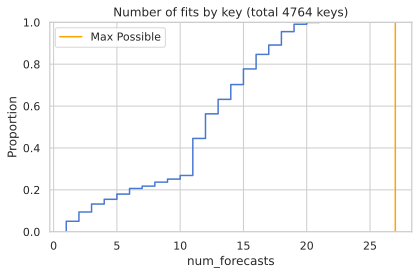

In [8]:
sns.ecdfplot(num_forecasts["num_forecasts"])
plt.title(f"Number of fits by key (total {len(num_forecasts)} keys)")
plt.axvline(27, color="orange", label="Max Possible")
plt.legend()
plt.tight_layout()
plt.savefig(f"plots/{result_name}-nfits.pdf", dpi=300)

In [9]:
num_forecasts.to_csv(f"plots/{result_name}-nfits.csv", index=None)

In [10]:
def compute_key(key):
    pred_df = (
        pd.DataFrame(
            {
                "timestamp": key_to_timestamps[key],
                "last_seqno": key_to_last_seqnos[key],
            }
        )
        .sort_values("timestamp")
        .set_index("timestamp")
    )
    true_df = (
        pd.DataFrame(
            {
                "timestamp": key_to_source_timestamps[key],
                "avg_cpu": key_to_source_series[key],
                "seq_no": key_to_source_seqno[key],
            }
        )
        .sort_values("timestamp")
        .set_index("timestamp")
    )

    merged = pd.merge_asof(
        left=true_df, right=pred_df, on="timestamp", direction="backward"
    )

    forecast = key_to_last_seqno_to_forecast[key]
    frame = pd.DataFrame(forecast)
    frame = (
        frame.T.reset_index()
        .melt("index")
        .rename(columns={"variable": "seq_delta", "index": "last_seqno"})
    )

    m = merged.dropna().reset_index(drop=True)
    m.loc[:, "seq_delta"] = (m["seq_no"] - m["last_seqno"]).astype(int)
    final = m.merge(frame, how="left", on=["last_seqno", "seq_delta"])

    mse_per_key_per_s = final.groupby(final["timestamp"].astype(int)).apply(
        lambda d: pd.Series(
            {"mse": ((d["avg_cpu"] - d["value"]) ** 2).mean(), "count": len(d)}
        )
    )
    mse_per_key_per_s["key"] = key
    return mse_per_key_per_s

with ProcessPoolExecutor() as executor:
    futs = executor.map(compute_key, key_to_timestamps.keys())
    mses = list(futs)

In [11]:
# we are dropping some keys here :sigh:
# need to figure out how to handle a key that's never fitted
# final length 4965 for 5000
all_mse = pd.concat([f.reset_index() for f in mses if len(f)])

In [12]:
all_mse.to_parquet(f"plots/{result_name}-all_mse.pq", index=None)

In [13]:
mse_by_timestamp = all_mse.groupby("timestamp").apply(
    lambda d: (d["mse"]*d["count"]).sum()/(d["count"].sum())
)

In [14]:
mse_by_timestamp.index = mse_by_timestamp.index-mse_by_timestamp.index.min()

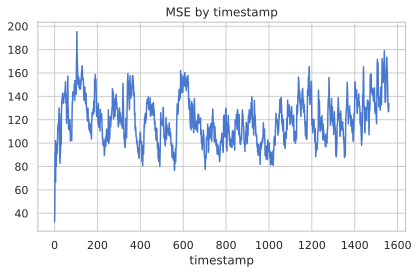

In [15]:
mse_by_timestamp.plot()
plt.title("MSE by timestamp")
plt.tight_layout()
plt.savefig(f"plots/{result_name}-mse-time.pdf", dpi=300)
mse_by_timestamp.to_csv(f"plots/{result_name}-mse-time.csv", index=True)